# Gradient Descent 梯度下降

官方解释——"梯度下降是一种一阶迭代优化算法，用于寻找可微分函数的局部最小值。"，但是用我的话来说梯度下降是机器学习和深度学习中常用的一种迭代技术，目的是为给定的模型、数据点和损失函数找到最佳的参数/系数集，从最初的、通常是随机的猜测开始。梯度下降的过程是通过不断地迭代来逐步改进参数的值，直到找到最佳的参数值为止。

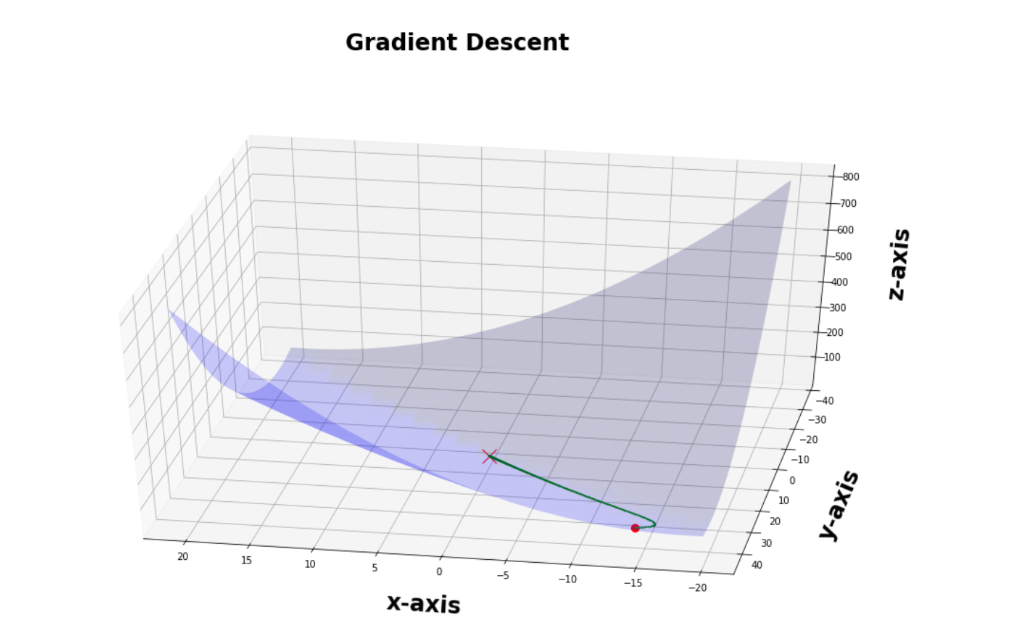

## Introduction简介
我认为通常解释梯度下降的方式缺乏直观性。学生和初学者只能看到一堆方程式和一般规则；这不是学习这样一个基本课题的方式。
如果你真正理解了梯度下降的工作原理，你也会明白数据的特点和你对超参数的选择（如小批量的大小和学习率）对模型训练的速度有什么影响。

但是，真正理解一个东西并不意味着你只通过手动操作方式；这也不能发展直觉。相反，理解意味着将不同设置的效果可视化，或者讲一个故事来说明这个概念。这就是你发展直觉的方式。

综上所述，我们将介绍使用梯度下降所需的五个基本步骤。此外，我们还将向你展示相应的Numpy代码，同时沿途解释许多基本概念。

但首先，我们需要一些数据来工作。我们将不使用一些外部数据集，而是：
- 定义我们要训练的模型，以更好地理解梯度下降。

- 为该模型生成合成数据。

这个模型必须是简单和熟悉的，这样你就可以专注于梯度下降的内部工作。

因此，我们将坚持使用一个尽可能简单的模型；一个具有单一特征x的线性回归，其方程式如下。

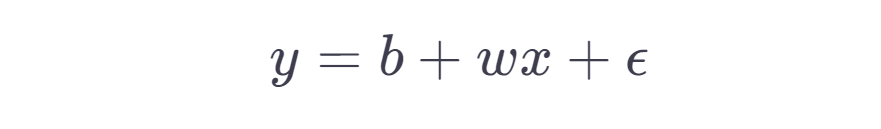

在这个模型中，我们使用一个特征（x）来尝试预测一个标签（y）的价值。我们的模型有三个要素：

- 参数b是偏差（或截距），它告诉我们当x为零时y的预期平均值。

- 参数w是权重（或斜率），它告诉我们如果我们把x增加一个单位，y会增加多少（平均而言）。

- 最后一个项（为什么总是用希腊字母？）ε是为了说明固有的噪声，也就是我们无法消除的误差。

我们也可以用一种不那么抽象的方式来构思相同的模型结构。

工资=最低工资+每年的增长*工作年限+噪音
为了更加具体，让我们说最低工资是1000元（无论什么货币或时间框架都不重要）。如果你没有经验，你的工资将是最低工资（参数b）。

除此之外，让我们假设（平均）你每有一年的经验，就会有2000元的增长（参数w）。因此，如果你有两年的工作经验，预计你的工资为5000元。然而，你的实际工资似乎是5,600元（你很幸运！）。由于该模型不能说明这些额外的600美元，从技术上讲，你的额外的钱是噪音。

## Data Generation数据生成

我们已经知道了我们的模型。为了生成它的合成数据，我们需要为它的参数选择值。在我们的案例中，我们选择了b=1和w=2（如，成千上万的美元）。

首先，让我们生成我们的特征（x），我们使用Numpy的rand方法随机生成100（N）个0到1之间的点。

然后，我们将我们的特征（x）和我们的参数b和w插入我们的方程，以计算我们的标签（y）。但我们也需要添加一些高斯噪声（epsilon）。否则，我们的合成数据集将是一条完美的直线。我们可以使用Numpy的randn方法产生噪声，它从一个正态分布（均值为0，方差为1）中抽取样本，然后乘以一个系数来调整噪声的大小。由于我们不想增加这么多的噪音，我们选择0.1作为我们的系数。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Variables initialized
true_b = 1
true_w = 2
N = 100

# Data generation process
np.random.seed(42)#保证每次产生的随机数相同
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Displaying the data that we generated (first 5 values)
print("X:", x[:5], "\n\nY:", y[:5])

X: [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]] 

Y: [[1.75778494]
 [2.87152788]
 [2.47316396]
 [1.99856008]
 [1.29007009]]


你注意到第7行的np.random.seed(42)了吗？这行代码实际上比它看起来更重要。它保证我们每次运行这段代码时都会生成相同的随机数。
**tips**
随机数并不完全是随机的；它们实际上是伪随机的，这意味着Numpy的数字发生器吐出的数字序列看起来是随机的。但它并不是。

这种行为的好处是，我们可以告诉生成器开始一个特定的伪随机数字序列。在某种程度上，它的作用就好像我们告诉生成器"请生成序列#42"。它将溢出一个数字序列。数字42的作用就像序列的索引，被称为种子。每次我们给它同样的种子，它就会生成同样的一组数字。

这意味着我们拥有两全其美的方法。一方面，我们确实生成了一个数字序列，就所有意图和目的而言，被认为是随机的。另一方面，我们有能力重现任何给定的序列。我无法强调这对于调试来说是多么的方便。

此外，你可以保证其他人能够重现你的结果。想象一下，如果运行本课程中的代码，每次都得到不同的输出，并且不得不怀疑是否有什么问题，这将是多么令人讨厌的事情。但是，由于我们设置了一个种子，即使它生成的是随机数据，我们也可以实现相同的输出

### 分割数据
接下来，让我们把我们的合成数据分成训练集和验证集，对索引阵列进行洗牌，并使用洗牌后的前80个点进行训练。可是为什么要对随机产生的数据点进行洗牌？难道它们的随机性还不够吗？

>是的，它们是足够随机的，在这个例子中，洗牌的确是多余的。但最好的做法是，在训练模型之前总是对数据点进行洗牌，以提高梯度下降的性能。不过，"总是洗牌 "的规则有一个例外，就是时间序列问题，洗牌会导致数据泄露。

### 训练-验证-测试分离
解释训练-验证-测试分离背后的原因超出了本教程的范围，但有两点我们想说：

- 分割应该始终是你做的第一件事。预处理和转换都不应该发生在之前。在分割之前什么都不会发生，这就是为什么我们在合成数据生成之后立即进行分割的原因。

- 在本章中，我们将只使用训练集。因此，我们懒得创建一个测试集，但我们还是进行了分割，以强调第1点。

你可以在下面的代码中看到这一点。

In [13]:
import numpy as np

idx = np.arange(N)
np.random.shuffle(idx)



# 使用80个随机索引作为训练集
train_idx = idx[:int(N*.8)]
#使用剩下的20个随机索引作为验证集
val_idx = idx[int(N*.8):]

# 生成训练集和验证集
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# 展示前5个训练集和后5个训练集
print('x_train: {}'.format(x_train[:5]))
print('x_train: {}'.format(x_train[75:]))



x_train: [[0.60754485]
 [0.54269608]
 [0.28093451]
 [0.89482735]
 [0.66252228]]
x_train: [[0.04522729]
 [0.54671028]
 [0.47221493]
 [0.19598286]
 [0.72900717]]



下图显示了生成数据的训练集（x_train, y_train）和验证集（x_val, y_val）的子图。

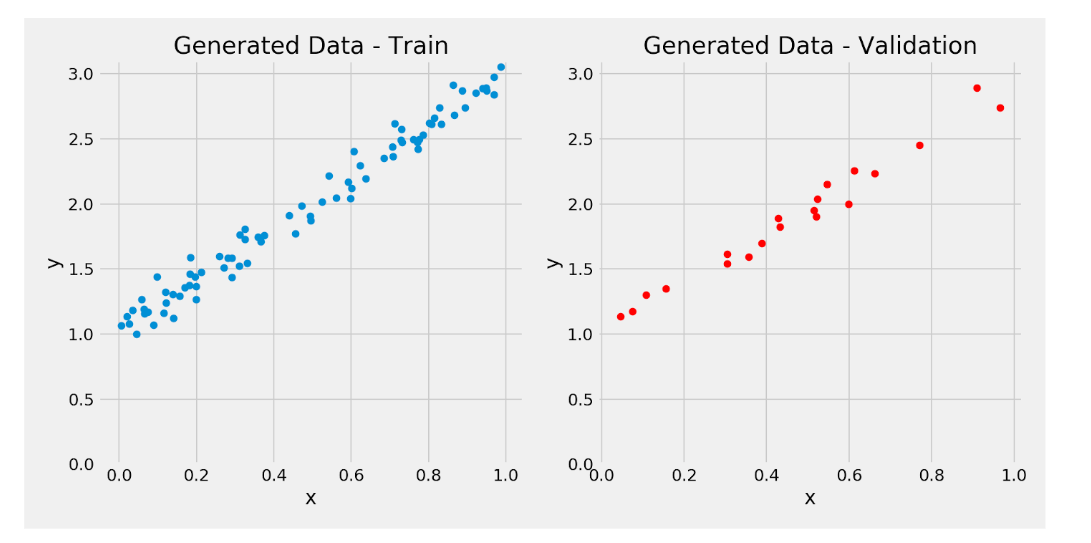

## 梯度下降的基本操作
### 随机初始化
在我们的例子中，我们已经知道了参数的真实值，但这显然不会发生在现实生活中。如果我们知道真值，为什么还要费力地训练一个模型来寻找它们呢？

鉴于我们永远不会知道参数的真实值，我们需要为它们设置初始值。然而，我们如何选择它们呢？

事实证明，随机的猜测和其他的一样好。为了训练一个模型，你需要随机地初始化参数/权重。在我们的案例中，我们只有两个：b和w。

这可以从下面的代码中观察到。


In [10]:
import numpy as np

np.random.seed(42)
b = np.random.randn(1)#np.random.randn(1)生成一个随机数
w = np.random.randn(1)
print("b:", b, "w:", w)

b: [0.49671415] w: [-0.1382643]


### 计算模型的预测值
这是个前向通道。它只是使用参数/权重的当前值来计算模型的预测值。

在一开始，我们将产生非常糟糕的预测，因为我们从第0步开始使用随机值。

In [11]:
# 随机初始化
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

# 前向传递计算预测值
y_hat = b + w * x_train 
# 展示前5个预测值
print(y_hat[:5])

[[0.42415907]
 [0.39898102]
 [0.3709876 ]
 [0.40856271]
 [0.47514568]]


下图显示了使用随机参数（b和w）进行的模型预测。

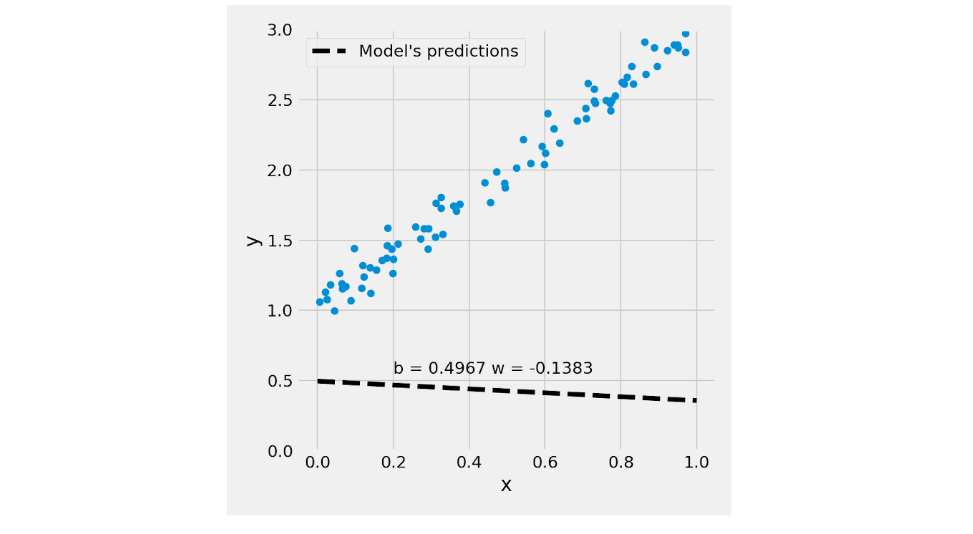

## 计算损失
损失由平均平方误差（MSE）给出。MSE是所有平方误差的平均值，即标签（y）和预测（b+wx）之间所有平方差的平均值。它有以下公式：
$\begin{aligned}MSE&=\frac1n\sum_{i=1}^n error_i^2\ &=\frac1n\sum_{i=1}^n(\tilde{y_i}-y_i)^2\ &=\frac1n\sum_{i=1}^n(b+wx_i-y_i)^2\end{aligned}$

损失不等同于误差，误差和损失之间有一个微妙但根本的区别：

- 误差是实际值（标签）和为单个数据点计算的预测值之间的差异。因此，对于一个给定的第i个点（来自我们的N个点的数据集），其误差是：error $_i=\hat{y}_i-y_i$

我们数据集中的第一个点（i = 0）的误差可以这样表示：

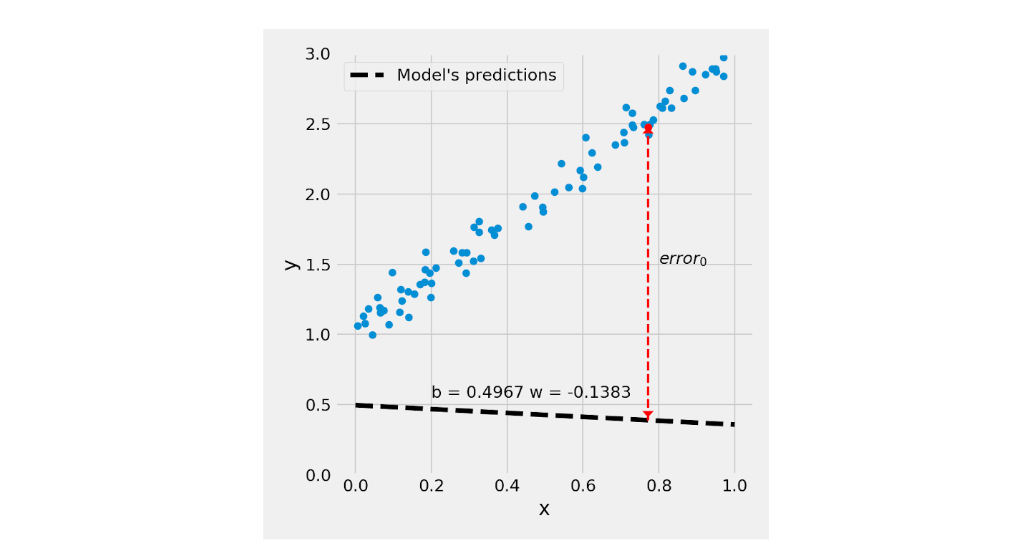

另一方面，损失是对一组数据点的某种误差的汇总。

计算所有（N）个数据点的损失似乎相当明显，对吗？嗯，是的，也不是。虽然它肯定会产生一条从初始随机参数到损失最小化的参数的更稳定的路径，但它也肯定会很慢。

这意味着人们需要为了速度而牺牲（一点）稳定性。这可以通过我们每次计算损失时从N个数据点中随机选择（不替换）一个子集来轻松实现。




### 梯度下降及其与损失的关系
下面简要介绍一下深度学习应用中大多使用的三种主要梯度下降类型以及它们与损失的关系：

- 如果我们使用训练集（n = N）中的所有点来计算损失，我们就是在进行**批量梯度下降**。

- 如果我们每次都使用一个点（n = 1），这就是**随机梯度下降**。

- 其他任何介于1和N之间的(n)都是**小型批量梯度下降**的特征。

现在让我们用Python计算一下损失

在我们的代码中，我们将使用训练集的所有数据点来计算损失。因此，n = N = 80；这意味着我们确实在进行批量梯度下降。

In [3]:
error = (y_hat - y_train)

# 它是一种回归问题，所以我们使用均方误差MSE
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


### code：

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#数据生成部分
true_b = 1
true_w = 2
N = 100
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon
#训练集
idx = np.arange(N)
np.random.shuffle(idx)
train_idx = idx[:int(N*0.8)]
x_train, y_train = x[train_idx], y[train_idx]
#验证集
val_idx = idx[int(N*0.8):]
x_val, y_val = x[val_idx], y[val_idx]
#随机初始化
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
y_hat = b + w * x_train
#计算损失
error = (y_hat - y_train)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


## 计算损失面
我们刚刚计算了随机初始化参数（b=0.49，w=-0.13）对应的损失（2.74）。如果我们对b和w的所有可能值都做同样的计算呢？好吧，不是所有可能的值，而是像下面代码中所示的例子那样，在一个给定的范围内所有均匀分布的值的组合。

In [4]:
# Reminder:
true_b = 1
true_w = 2

# 我们在100的范围内随机初始化b和w
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid函数用两个坐标轴上的点在平面上画格
bs, ws = np.meshgrid(b_range, w_range)
print(bs.shape, ws.shape)


(101, 101) (101, 101)


meshgrid操作的结果是两个(101, 101)矩阵，代表网格内每个参数的值。其中一个矩阵是什么样子的？

让我们通过在下面的代码中显示其中一个来检查一下。

In [5]:
# Printing one of the matrices we got from meshgrid
print(bs)

[[-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 ...
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]
 [-2.   -1.94 -1.88 ...  3.88  3.94  4.  ]]


当然，我们在这里有些作弊，因为我们知道b和w的真实值，可以为参数选择完美的范围。然而，这只是出于教育目的，所以我们现在先保留它。

接下来，我们可以用这些值来计算相应的预测值、误差和损失。

### 计算预测值
让我们先从训练集的单个数据点开始，计算我们网格中每个组合的预测值。

In [6]:
dummy_x = x_train[0] # taking single data point from training set
dummy_yhat = bs + ws * dummy_x # 对每个b和w计算预测值
print(dummy_yhat.shape)

(101, 101)


由于Numpy的广播功能，它可以理解我们要用相同的x值乘以ws矩阵的每一个条目。这一操作的结果是对该单一数据点的预测的网格。

现在，我们需要对训练集中的80个数据点中的每一个都这样做，这可以通过使用Numpy的**apply_along_axis**来完成。

In [7]:
#计算每个预测值的损失，apply_along_axis函数沿着指定的轴应用函数
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train,
)
print(all_predictions.shape)

(80, 101, 101)


我们得到了80个形状为（101，101）的矩阵。我们对每个数据点都有一个矩阵，每个矩阵都包含一个预测的网格。

### 计算误差
正如我们之前学到的，误差是预测值和标签之间的差异。然而，我们不能马上执行这个操作。我们需要在我们的标签（y）上做一些工作，使它们具有适当的形状（广播是好的，但不是那么好）。

In [8]:
# reshape函数将数组转换为指定的形状，第一个参数-1表示自动计算，第二个参数1表示行向量，第三个参数1表示列向量
all_labels = y_train.reshape(-1, 1, 1)
print(all_labels.shape)

(80, 1, 1)


我们的标签变成了80个形状为（1，1）的矩阵，这是最无聊的一种矩阵，但这足以让广播发挥其魔力。我们现在可以计算误差了。

In [9]:
# computing errors of all 80 data points
all_errors = (all_predictions - all_labels)
print(all_errors.shape)

(80, 101, 101)


每个预测都有自己的误差，所以我们得到了80个形状为（101，101）的矩阵，同样，每个数据点有一个矩阵，每个矩阵都包含一个误差网格。

### 计算平均平方误差
唯一缺少的步骤是计算平均平方误差（MSE）。为了计算这个，我们首先取所有误差的平方。然后，我们对所有的数据点进行平均。由于我们的数据点在第一维，我们使用轴=0来计算这个平均值。

In [10]:
# axis=0表示沿着第一个轴计算均值
all_losses = (all_errors ** 2).mean(axis=0)
print(all_losses.shape)

(101, 101)


结果是一个损失的网格，一个形状为（101，101）的矩阵，每个损失对应于不同的参数组合：b和w。

这些损失是我们的损失面，它可以在一个三维图中可视化，其中纵轴（z）代表损失值。如果我们把产生相同损失值的b和w的组合连接起来，我们将得到一个椭圆。然后，我们可以在原始的b x w平面上画出这个椭圆（损失值为3时为蓝色）。

简而言之，这就是等高线图的作用。从现在开始，我们将总是使用等高线图而不是相应的三维版本。

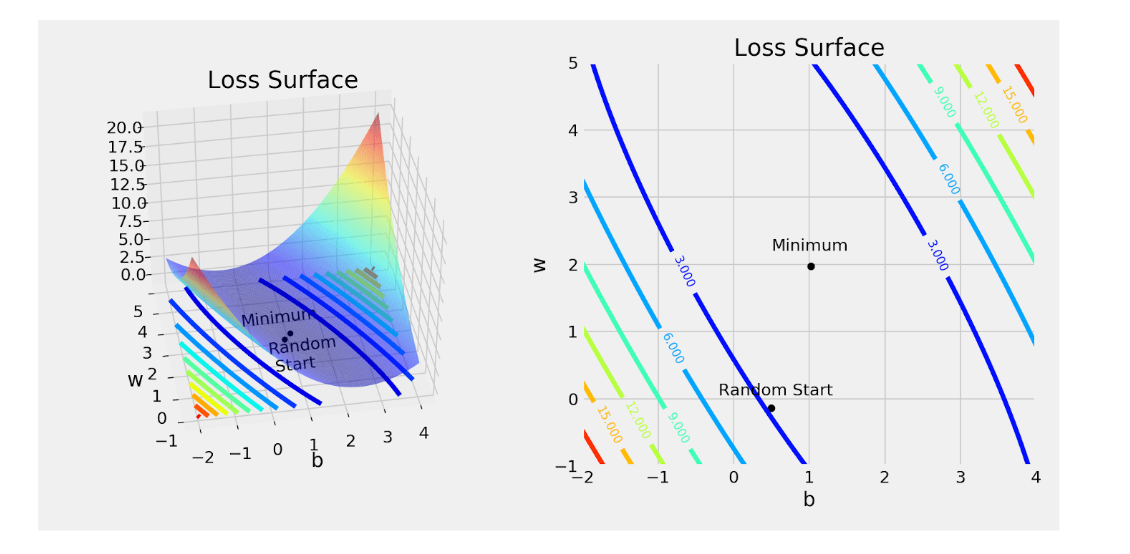

在图的中心，参数（b，w）的值接近于（1，2），损失处于最小值。这就是我们使用梯度下降法试图达到的点。

在底部和稍稍靠左的位置，是随机的起始点，对应于我们随机初始化的参数。

这是处理像单一特征的线性回归这样的简单问题的好处之一；我们只有两个参数，因此我们可以计算和可视化损失面。

### 横断面
处理线性回归的另一个好处是，我们可以在损失表面切开一个截面，以检查如果其他参数保持不变，损失是什么样子。

让我们先把b=0.52（b_range中最接近我们的b初始随机值的值：0.4967）。我们在我们的损失面（左图）上垂直切开一个截面（红色虚线），我们得到右边的结果图。
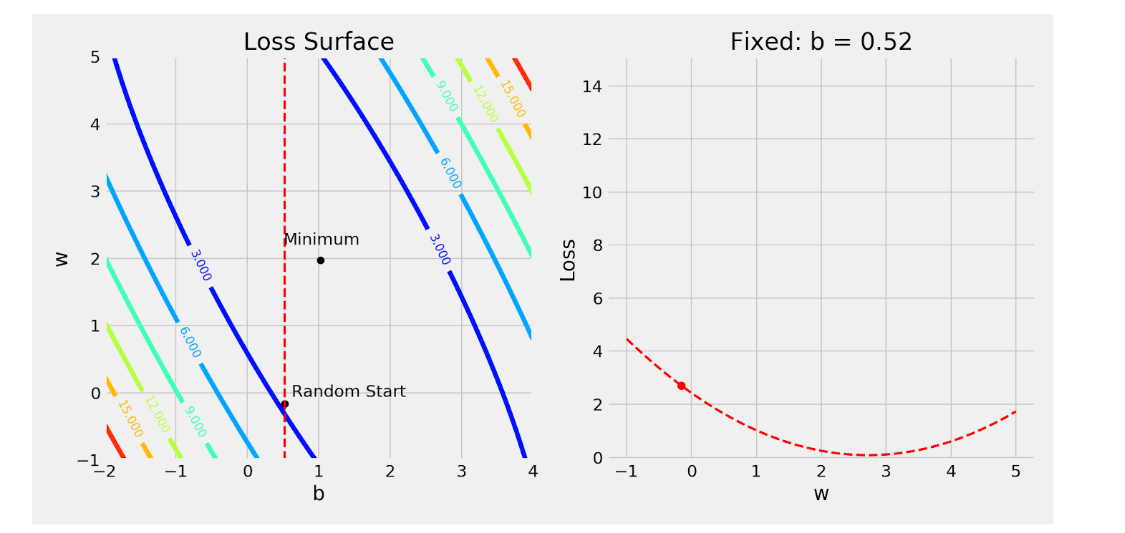

这个横截面告诉我们什么？它告诉我们，如果我们保持b不变（0.52），如果w增加（达到2和3之间的某个值），损失（从参数w的角度看）可以达到最小。

当然，不同的b值对w产生不同的截面损失曲线，而这些曲线将取决于损失面的形状。

到目前为止，很好。那么另一个横截面呢？让我们现在把它水平切开，使w=-0.16（w_range中最接近我们的b的初始随机值的值：-0.1382）。结果图在右边。

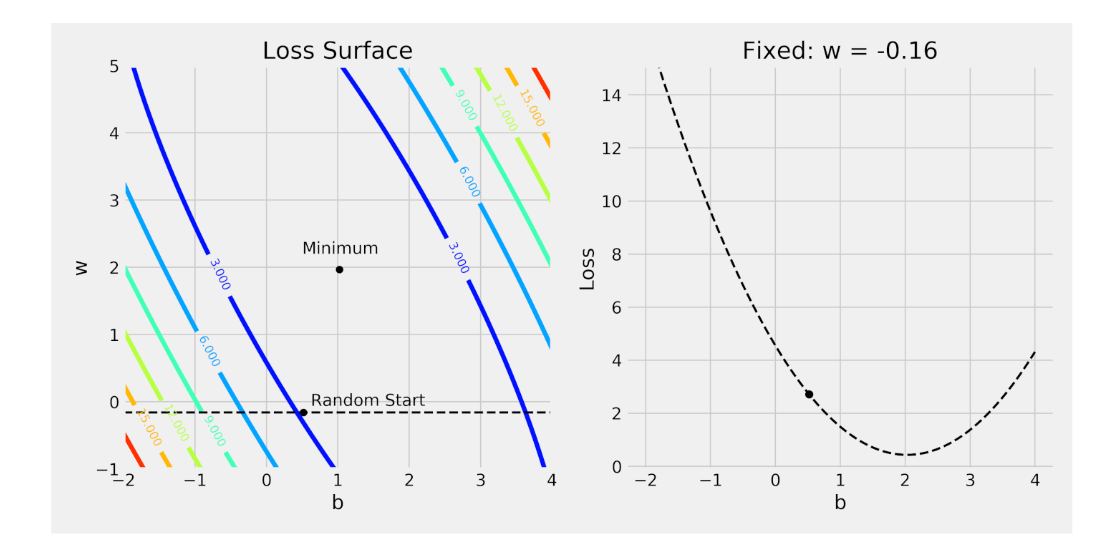

现在，如果我们将w保持在-0.16不变，如果b被增加，损失（从参数b的角度看）可以最小化，直到接近2的某个值。

 
一般来说，这个截面的目的是为了得到改变一个参数而保持其他一切不变对损失的影响。简而言之，这就是一个梯度。

现在，问你一个问题：当我们修改变化的参数时，两条虚线中的哪一条，红色（w变化；b不变）或黑色（b变化；w不变），产生的损失变化最大？

### 计算梯度

梯度是一个偏导数；为什么是偏导数？因为它是相对于（w.r.t.）一个单一参数计算的。由于我们有两个参数，b和w，我们必须计算两个偏导。

导数告诉你，当你稍微改变一些其他的量时，一个给定的量会改变多少。在我们的例子中，当我们分别改变两个参数中的每一个时，我们的MSE损失会有多大变化？

梯度 = 如果一个参数稍有变化，损失会有多大的变化!

下面方程的最右边部分是你在实现简单线性回归的梯度下降时通常看到的。在中间步骤中，你会看到应用链式规则所弹出的所有元素，所以你知道最终的表达式是如何产生的。这可以在下面看到：
$\begin{aligned}\frac{\partial M SE}{\partial b}=\frac{\partial M S E}{\partial\hat{y}_i}\cdot\frac{\partial y_i}{\partial b}=\frac{1}{n}\sum_{i=1}^n2(b+wx_i-y_i)\ &=2\frac{1}{n}\sum_{i=1}^n(y_i-y_i)\\ \frac{\partial M S E}{\partial w}=\frac{\partial M S E}{\partial y_i}\cdot\frac{\partial g_i}{\partial w}=\ \frac{1}{n}\sum_{i=1}^n2(b+w x_i-y_i)\cdot x_i\ &=2\frac{1}{n}\sum_{i=1}^n\sum_{i=1}^n x_i(\partial_i-y_i)\ \end{aligned}
$

为了清楚起见，我们将始终使用我们在步骤2开始时计算的 "常规 "误差。损失面肯定是吸引眼球的，但正如我们之前提到的，只为教育目的使用它是可行的。

利用上述方程，我们现在将计算与b和w系数有关的梯度:

In [11]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### 梯度的可视化
由于b的梯度（绝对值为3.04）大于w的梯度（绝对值为1.83），那么黑色曲线（b变化；w不变）产生的损失变化最大。

"这是为什么？"

为了回答这个问题，让我们先把两张横截面图并排放在一起，这样我们就可以更容易地进行比较。它们之间的主要区别是什么？

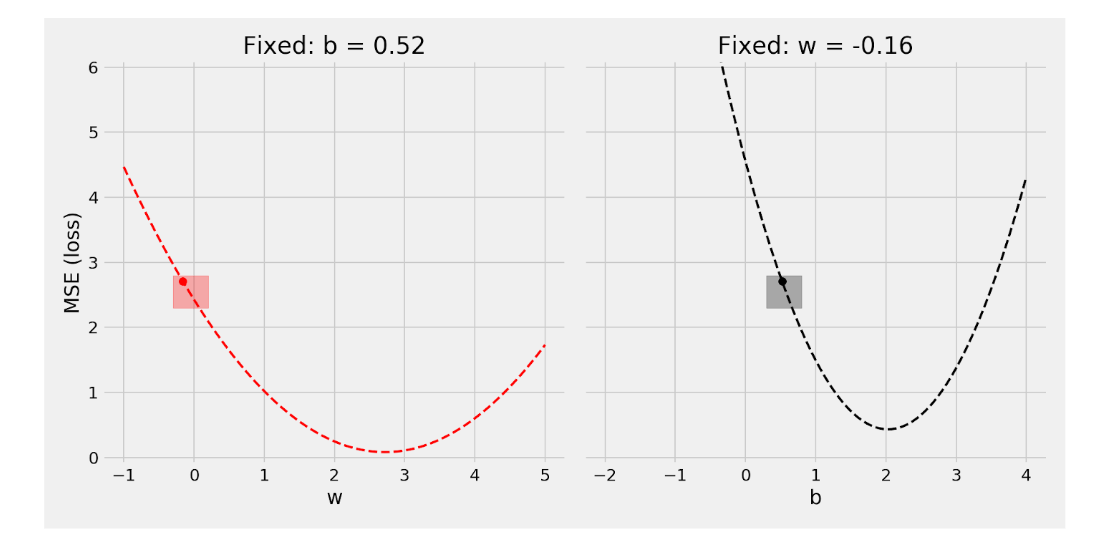

右边的曲线更陡峭。这就是你的答案!陡峭的曲线有更大的坡度。酷！这正是我们的直觉。现在，让我们变得更有几何性。从横截面的部分，我们已经知道，为了使损失最小化，b和w都需要增加。因此，保持使用梯度的精神，让我们将每个参数增加一点（始终保持另一个参数固定）。顺便说一下，在这个例子中，一点等于0.12。这是为了方便起见，所以它的结果是一个更漂亮的图。

这些增加对损失有什么影响？让我们来看看。

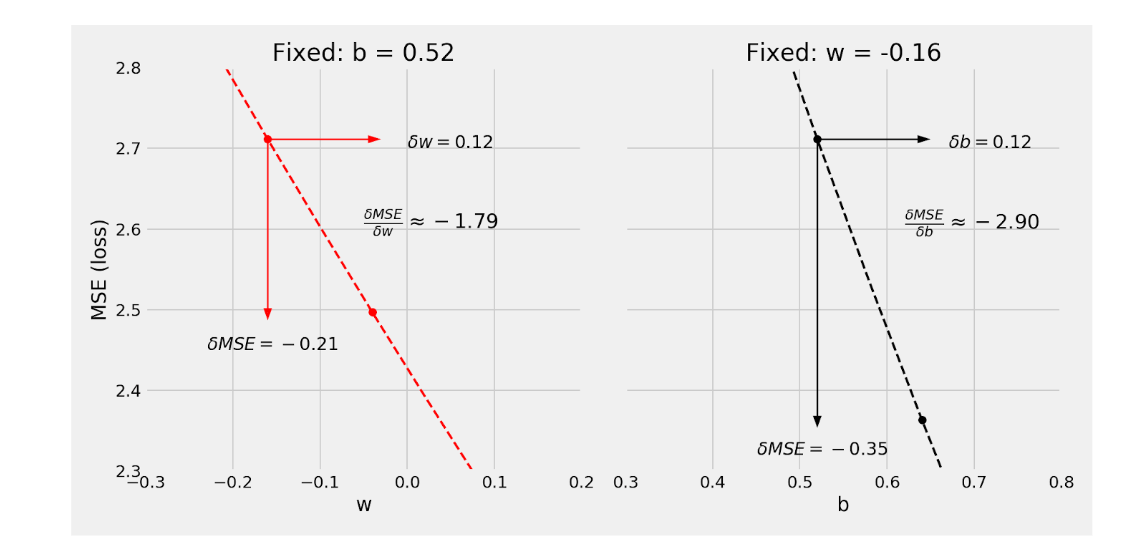

在左边的图中，增加0.12的w会产生0.21的损失减少。从几何学角度计算的、大致近似的梯度是由这两个值之间的比率给出的，即-1.79。

这个结果与梯度的实际值（-1.83）相比如何？对于一个粗略的近似值来说，它实际上还不错。还能更好吗？当然可以。如果我们让w的增加量越来越小（比如0.01而不是0.12），我们会得到越来越好的近似值。当增幅接近零时，我们就会得出梯度的精确值。嗯，这就是导数的定义!

同样的推理也适用于右边的图；以同样的0.12增加b，会产生更大的损失减少，即0.35。更大的损失减少，更大的比率，更大的梯度，也有更大的误差，因为几何近似值（-2.90）离实际值（-3.04）更远了。

是时候问另一个问题了：你最喜欢哪条曲线（红色或黑色）来减少损失？应该是黑色的那条，对吗？嗯，是的，但这并不像我们所希望的那样简单明了。我们将在后面深入探讨这个问题。

### 反向传播
现在你已经了解了如何使用链式规则计算损失函数的梯度，让我们向你展示维基百科是如何描述反向传播的。

逆向传播算法的工作原理是通过链式规则计算损失函数相对于每个权重的梯度，一次计算一层梯度，从最后一层向后迭代，以避免链式规则中的中间项的冗余计算。

术语 "反向传播 "严格说来只指计算梯度的算法，而不是指如何使用梯度。该术语通常被宽泛地用来指整个学习算法，包括梯度的使用方式，即通过随机梯度下降。

这看起来很熟悉吗？逆传播只不过是 "链式 "梯度下降。简而言之，神经网络是用反向传播来训练的，从最后一层开始，一路往回走，通过所有层来更新权重。

在我们的例子中，我们只有一个层，甚至只有一个神经元，所以没有必要进行反向传播（下一章会有更多介绍）。
## 更新参数
在最后一步，我们使用梯度来更新参数。由于我们试图使我们的损失最小化，所以我们将梯度的符号倒过来进行更新。

还有一个超参数需要考虑：学习率，用希腊字母eta表示（看起来像字母n）。这就提出了我们需要应用于参数更新梯度的乘法因素。我们的方程现在变成了以下内容:

$
\begin{aligned}b&=b-\eta\frac{\partial MSE}{\partial b}\ w&=w-\eta\frac{\partial MSE}{\partial w}\end{aligned}$

我们也可以用不同的方式来解释这一点；每个参数的值都会被一个常数，即eta（学习率）所更新。但这个常数将由该参数对最小化损失（其梯度）的贡献程度来加权。

老实说，我相信这种对参数更新的思考方式更有意义。首先，你决定一个学习率，指定你的步骤大小，而梯度告诉你对每个参数采取步骤的相对影响（对损失）。然后，你采取与相对影响成正比的特定步骤；影响越大，步骤越多。

在我们的例子中，让我们从0.1的学习率值开始（就学习率而言，这是一个相对较大的值）。

In [12]:
# 设置学习率
lr = 0.1
print(b, w)

# 使用梯度和学习率更新参数
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


一次更新对我们的模型有什么影响？让我们直观地检查一下它的预测结果。

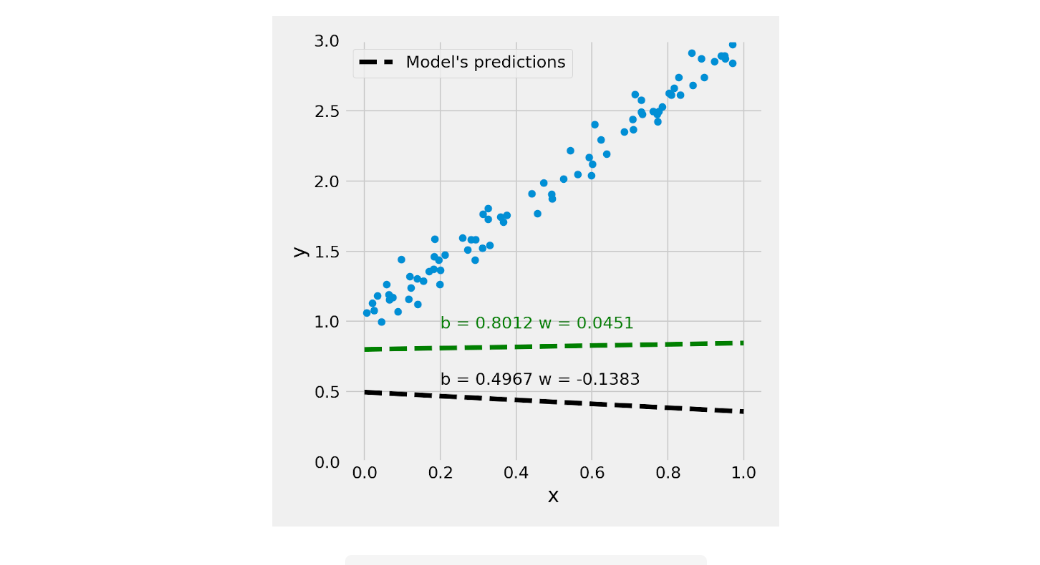

它看起来更好；至少它开始指向正确的方向。

## 学习率

学习率是最重要的超参数。关于如何选择学习率，如何在训练中修改学习率，以及错误的学习率如何完全破坏模型训练，有大量的材料。

也许你已经看到了这个著名的图表（来自斯坦福大学的CS231n班），它显示了学习率过大或过小是如何影响训练期间的损失的。这几乎是常识，但需要彻底解释和直观展示才能真正理解。所以，让我们开始吧!

首先，我给大家讲一个小故事（试图在这里打一个比方）：
想象一下，你从山区徒步旅行回来，你想尽快回家。在你的道路上的某个点，你可以选择继续前进或右转。前面的路几乎是平坦的，而你右边的路则有些陡峭。陡峭程度就是坡度。如果你朝一个方向迈出一步，就会导致不同的结果（如果你向右迈出一步而不是朝前走，你会下降更多）。但是，你知道你右边的路能让你更快地回家，所以你不只是走一步，而是朝那个方向走多步。路越陡峭，你走的步子就越多！你就是忍不住想走。你就是无法抵制走那么多步的冲动；你的行为似乎完全由风景决定。但是，你仍然有一个选择。你可以调整你台阶的大小。你可以选择走任何大小的步子，从微小的步子到长长的步子。这就是你的学习速度。

让我们看看这个小故事到目前为止给我们带来了什么；这就是你将如何行动的简述：

更新的位置=以前的位置+步长*步数。现在，将它与我们的参数进行比较：

更新值=先前值-学习率*梯度

你明白了，对吗？我希望如此，因为这个比喻现在完全崩塌了。此时，在向一个方向移动后（比如说，我们谈到的右转），你将不得不停下来，向另一个方向移动（只是一小段，因为路径几乎是平的，记得吗？），等等。

### 选择学习率
无论如何，让我们进一步探讨你唯一的选择；你的步骤的大小或学习率。

#### 小的学习率
从小步开始是有意义的，对吗？这意味着使用一个小的学习率。小的学习率是比较安全的，这是预料之中的。如果你在爬山回家时采取微小的步骤，你将更有可能安然无恙地到达那里，但这将需要大量的时间。

训练模型也是如此；小的学习率很可能最终让你达到（某个）最低点。不幸的是，时间就是金钱，特别是当你为云中的GPU时间付费时。因此，有动力去尝试更大的学习率。

这个推理如何适用于我们的模型？通过计算我们的（几何）梯度，我们知道我们需要采取一定数量的步骤。1.79（参数w）和2.90（参数b），分别。让我们把我们的步长设定为0.2（小的）。这意味着我们对w移动0.36，对b移动0.58。

但是在现实生活中，0.2的学习率通常被认为是大的，但在我们非常简单的线性回归的例子中，它仍然被认为是 "小的"。

这个运动将我们引向何处？正如你在下面的图中所看到的（如原图右边的新点所示），在这两种情况下，这种运动使我们更接近最小值。这种效果在右边更明显，因为曲线更陡峭。

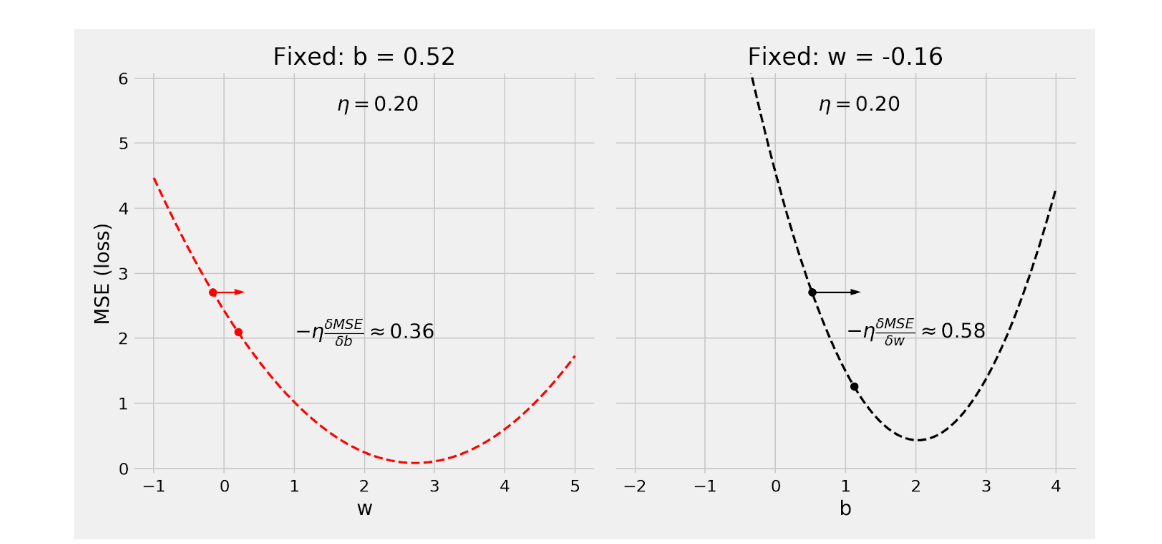

#### 大的学习率
如果我们使用一个大的学习率，例如0.8的步长，会发生什么？正如我们在下面的图中所看到的，我们开始真的遇到了麻烦。

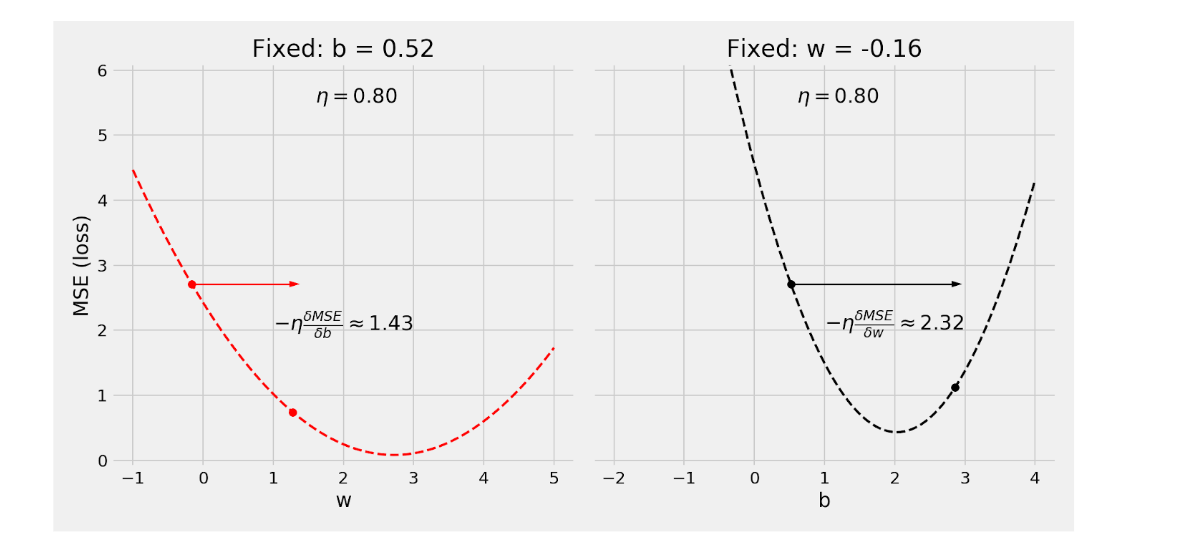

尽管在左边的图上一切都还不错，但右边的图向我们展示了完全不同的情况；我们最终在曲线的另一边。这可不好。你会来回走动，交替撞到曲线的两边。


#### 非常大的学习率
让我们使用一个非常大的学习率，比如说，步长为1.1!

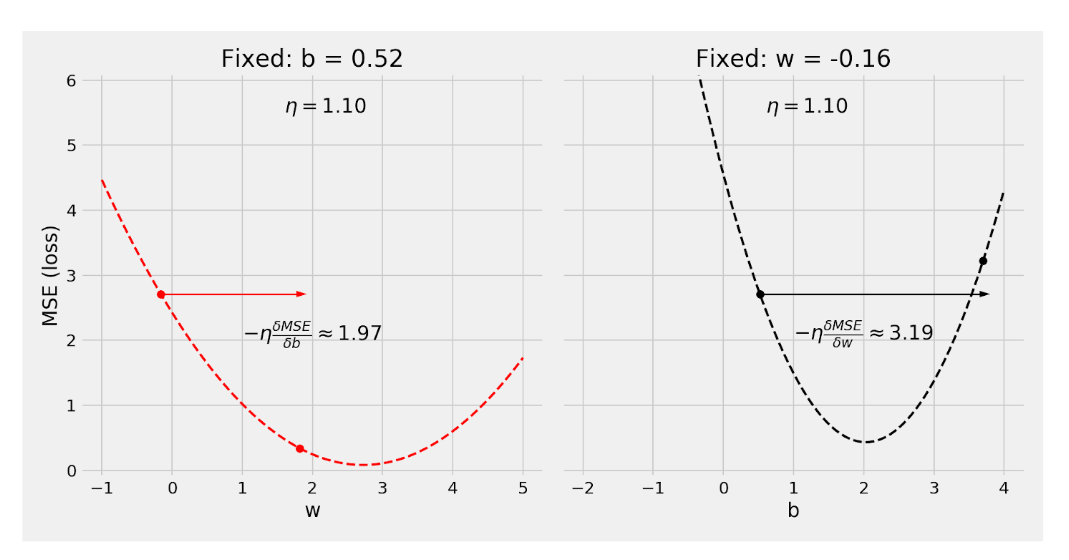

好吧，这很糟糕。在右边的图中，我们不仅再次在曲线的另一边结束，而且实际上我们还爬了上去。这意味着我们的损失增加了，而不是减少了!这怎么可能呢？你在下坡时走得那么快，最后又爬上去了？不幸的是，这个比喻不能再帮助我们了。我们需要以不同的方式来思考这个特殊的案例。

首先，注意到左图上的一切都很好。巨大的学习率并没有造成任何问题，因为左边的曲线没有右边的那么陡峭。换句话说，左边的曲线可以比右边的曲线承受更大的学习率。

我们能从中学到什么？

对于一个学习率来说，太大是一个相对的概念。它取决于曲线有多陡峭，或者取决于梯度有多大。我们确实有许多曲线和许多梯度。每个参数都有一个。但我们只有一个单一的学习率可供选择（对不起，事情就是这样）。这意味着学习率的大小被最陡峭的曲线所限制。所有其他的曲线必须效仿。意味着，鉴于它们的形状，它们将使用一个次优的学习率。合理的结论是，如果所有的曲线都同样陡峭，那是最好的，所以学习率对所有的曲线来说都更接近于最优

## 扩展数据集

通过观察不同学习率的结果，我们得出的结论是，如果所有的曲线都同样陡峭，那是最好的，所以学习率对所有的人来说都更接近于最佳状态

那么，我们如何实现同样陡峭的曲线呢？简短的答案是：你必须 "正确地 "扩展你的数据集。现在让我们深入探讨一下如何**缩放你的数据集来帮助实现同样陡峭的曲线**。

"坏 "的特征
首先，让我们看看一个稍加修改的例子，我们将其称为 "坏 "数据集。

在这里，我们把我们的特征（x）乘以10，所以它现在在[0，10]的范围内，并重新命名为bad_x。

但是，由于我们不希望标签（y）发生变化，我们也将原来的true_w参数除以10，并重新命名为bad_w。这样，bad_w * bad_x和w * x的结果都一样。

In [13]:
true_b = 1
true_w = 2
N = 100

# Data generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still 
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))
# Displaying the bad_w parameter along with the bad_x values (first five)
print("bad_w: {} \n\nbad_x: {}".format(bad_w, bad_x[:5]))

bad_w: 0.2 

bad_x: [[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]]


然后，我们对原始数据集和坏数据集进行了与之前相同的分割，并将训练集并排绘制，如下图所示。

In [14]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before, 
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

# Displaying the training and validation data (first five)
print("bad_x_train: {} \n\nbad_x_val: {}".format(bad_x_train[:5], bad_x_val[:5]))

bad_x_train: [[7.71270347]
 [0.6355835 ]
 [8.63103426]
 [0.25419127]
 [7.31993942]] 

bad_x_val: [[3.04613769]
 [1.5599452 ]
 [6.62522284]
 [1.07891427]
 [9.09320402]]


下图显示了原始训练数据集和不良训练数据集之间的差异。

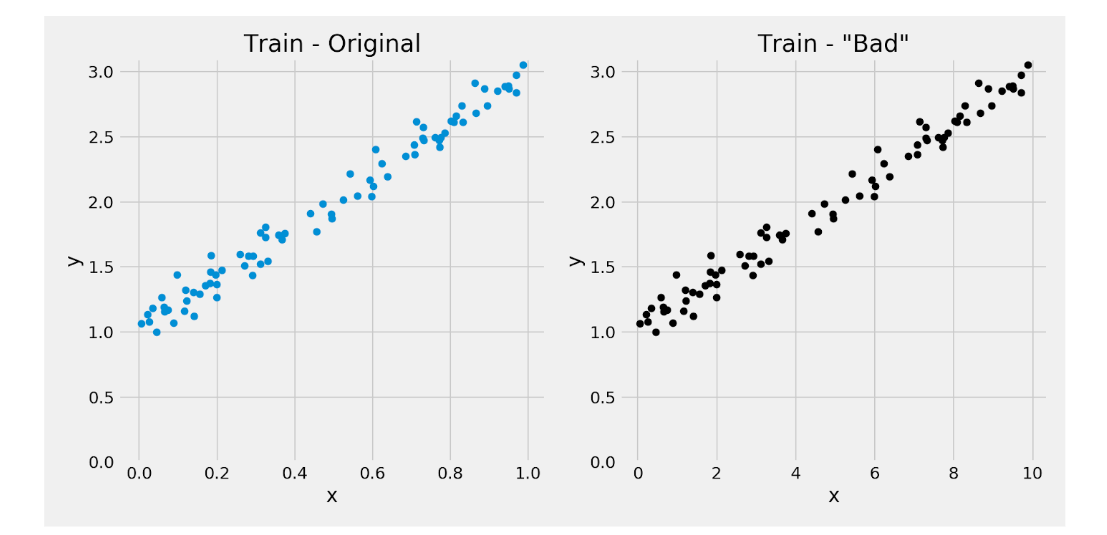

两幅图的唯一区别是特征x的比例。它的范围以前是[0, 1]，现在是[0, 10]。标签y没有变化，而且我们也没有触及true_b。

这种简单的缩放对我们的梯度下降有任何有意义的影响吗？好吧，如果没有，我们就不会问这个问题了，对吗？

让我们计算一个新的损失面，并将其与之前的损失面进行比较。

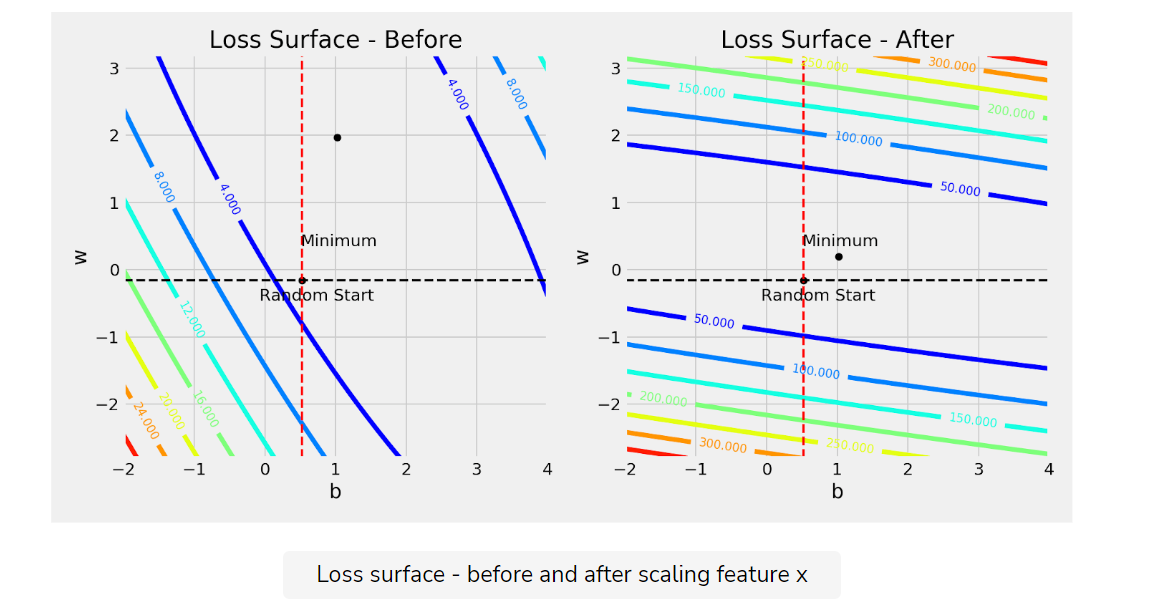

看一下上图的等值线，之前的深蓝色线是4.0，现在是50.0。对于相同的参数值范围，损失值要大得多。

让我们看一下我们将特征x乘以10之前和之后的截面图。

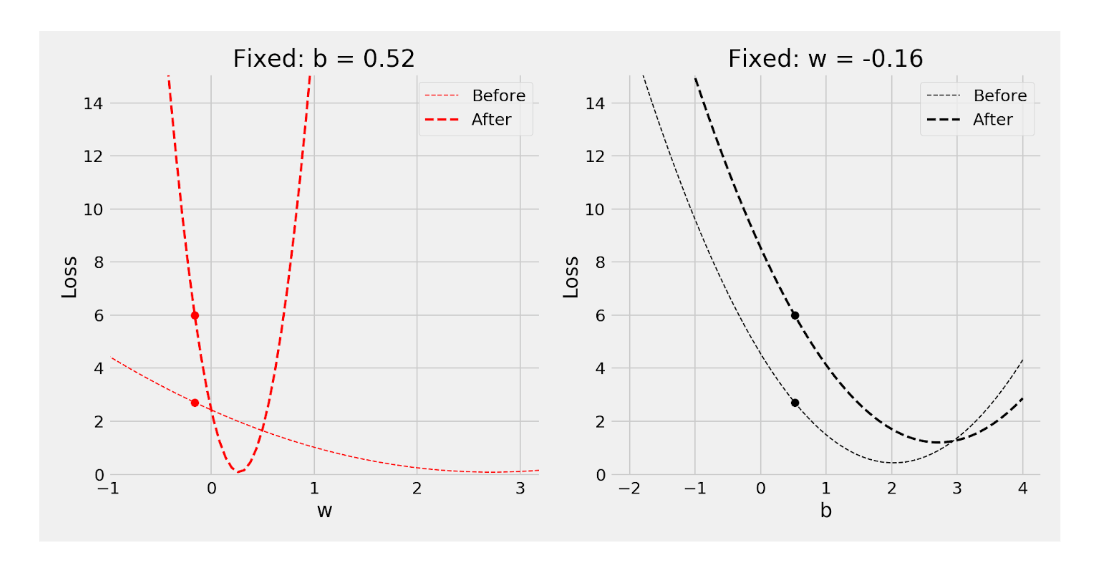

这里发生了什么？红色曲线变得更加陡峭（梯度更大），因此我们必须使用较小的学习率来安全地随着它下降。更重要的是，红色和黑色曲线之间的陡度差异增加了。这正是我们需要避免的！!你还记得为什么吗？因为学习率的大小被最陡峭的曲线所限制!

我们怎样才能解决这个问题呢？好吧，我们通过把它的比例放大10倍而毁了它。也许，如果我们以不同的方式进行**缩放**，我们可以让它变得更好。

### 规模化/标准化/规范化
如何不同？有一个美丽的东西叫StandardScaler，它以这样一种方式对一个特征进行转换，使其最终具有零平均值和单位标准差。

它是如何实现的呢？首先，它使用训练集（N个点）计算出一个给定特征（x）的平均值和标准差。

$\begin{aligned}X&=\frac1N\sum_{i=1}^{N}x_i ,\sigma(X)=\sqrt{\frac1N\sum_{i=1}^{N}(x_i-\bar X)^2}\end{aligned}$
然后，它使用这两个值来缩放特征:
$\:\textit{scaled}\:x_i\:= $ $\begin{aligned}x_i&~-~\bar{X}\\ \hline\sigma(X)\end{aligned}$

如果我们要重新计算比例特征的平均值和标准差，我们将分别得到0和1。这个预处理步骤通常被称为归一化。虽然，从技术上讲，它应该总是被称为标准化。


### 零平均数和单位标准差

让我们从单位标准差开始。也就是说，对特征值进行缩放，使其标准差等于1。这是最重要的预处理步骤之一，不仅是为了提高梯度下降的性能，而且对其他技术，如主成分分析（PCA）也是如此。目标是让所有的数字特征处于相似的尺度上，所以结果不会受到每个特征的原始范围的影响。

想想一个模型中的两个常见特征：年龄和工资。年龄通常在0到110之间变化，而工资可以从低的几百（比如500）到几千（比如9000）。如果我们计算相应的标准差，我们可能得到的数值分别是25和2000。因此，我们需要将这两个特征标准化，让它们处于平等地位。

然后是零平均值，也就是把特征的中心放在零处。更深层的神经网络可能会遭受一种非常严重的情况，即梯度消失。由于梯度是用来更新参数的，越来越小的（消失的）梯度意味着越来越小的更新，直到停滞不前的程度。最终，网络会简单地停止学习。帮助网络对抗这种情况的一个方法是将其输入（特征）集中于零。

### 使用StandardScaler方法
重要提示：像StandardScaler这样的预处理步骤必须在训练-验证-测试分割之后进行；否则，你将会把验证和/或测试集的信息泄露给你的模型

在只使用训练集来拟合StandardScaler之后，你应该使用其转换方法将预处理步骤应用于所有数据集：训练、验证和测试。

下面的代码也将说明这一点。

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

# Displaying scaled training and validation sets (first five values)
print("scaled_x_train:{} \n\nscaled_x_val:{}".format(scaled_x_train[:5], scaled_x_val[:5]))

scaled_x_train:[[ 0.97579054]
 [-1.33529489]
 [ 1.27567819]
 [-1.45984132]
 [ 0.84753056]] 

scaled_x_val:[[-0.54811074]
 [-1.0334378 ]
 [ 0.62066576]
 [-1.19052198]
 [ 1.42660312]]


请注意，我们不是在重新生成数据。我们使用原始特征x作为StandardScaler的输入，并将其转化为一个按比例的x，而标签（y）则不被触及。

让我们把它们三个（原始的、"坏的 "和缩放的）并排画出来，以说明其中的差别。

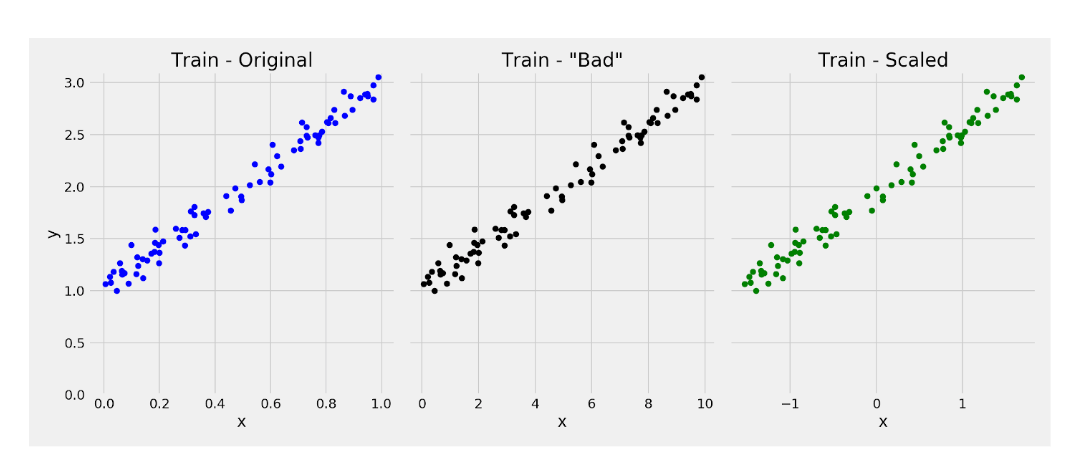

再一次，图中唯一的区别是特征x的比例，它的范围原来是[0, 1]。然后我们把它变成了[0, 10]，而现在StandardScaler把它变成了[-1.5, 1.5]。

好了，该检查损失面了。为了说明其中的差别，我们将把它们三个并排绘制：原始的、"坏的 "和缩放的。

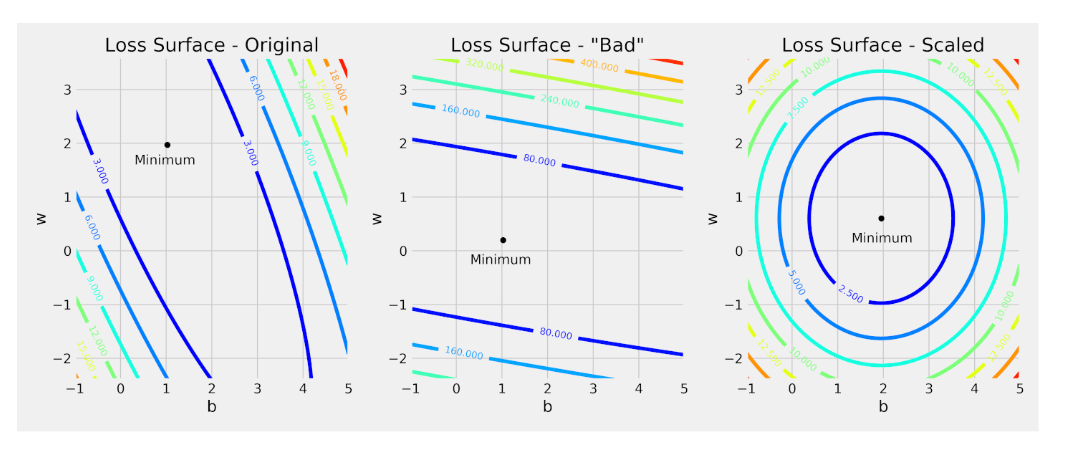

很漂亮，不是吗？

在实践中，这是人们所希望的最好的表面；横截面将是类似的陡峭，其中一个的良好学习率对另一个也是好的。

当然，在现实世界中，你永远不会得到一个这样漂亮的碗。但我们的结论仍然成立。

## 数据冲洗和迭代

### epoch简介
在我们继续我们的进程之前，让我们探讨一下究竟什么是epoch，以及它什么时候完成，因为我们以后将经常使用这个超参数。

epochs的数量是一个超参数，指的是通过训练集使用的算法的完整迭代的数量。只要训练集（N）中的每一个点都已经在所有的步骤中使用过，一个历时就完成了：向前传递、计算损失、计算梯度和更新参数。

### 更新和梯度下降
在一个历时中，我们至少要进行一次更新，但不超过N次更新。更新的数量（N/n）将取决于正在使用的梯度下降的类型。

- 对于批处理（n = N）梯度下降，这是微不足道的，因为它使用所有的点来计算损失；一个历时与一次更新相同。

- 对于随机（n = 1）梯度下降，一个历时意味着N次更新，因为每个单独的数据点都被用来执行一次更新。

- 对于大小为n的小批量，一个epoch有N/n个更新，因为一个小批量的n个数据点被用来执行更新。

### 重新启动进程
回到我们之前所做的，现在我们使用更新的参数回到计算模型预测值这一步，并重新启动这个过程，反复进行这个过程，并持续许多个历时，简而言之就是训练一个模型。如果我们运行1000个epochs会发生什么？我们可以通过看下面的图来检查结果。

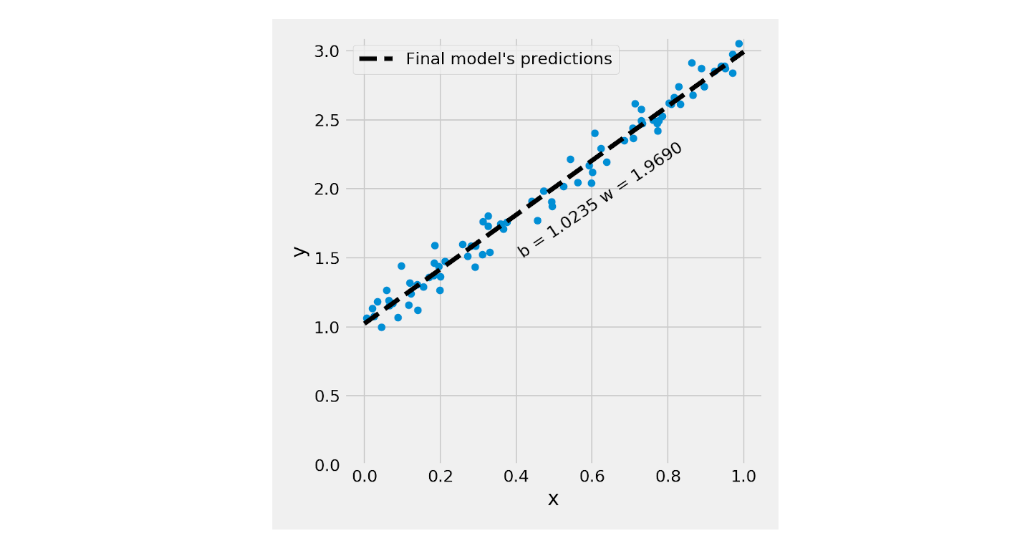

在下一章，我们将把所有这些步骤放在一起，并运行1000个epochs，所以我们将得到上图中描绘的参数b=1.0235和w=1.9690。

### 梯度下降的路径
在前面，我们已经看到了损失面和随机起始点和最小点。梯度下降从随机起点到最小点要走哪条路？会花多长时间？它是否真的能达到最小值？所有这些问题的答案都取决于很多东西，比如学习率、损失面的形状以及我们用来计算损失的点的数量。根据我们使用的是批处理、小批处理还是随机梯度下降，路径或多或少都会比较平滑，而且很可能在更多或更少的时间内达到最小值。

为了说明这些差异，我们使用80个数据点（批处理）、16个数据点（迷你批处理）或单个数据点（随机）来计算损失，在100个历时中产生了路径，如下图所示。

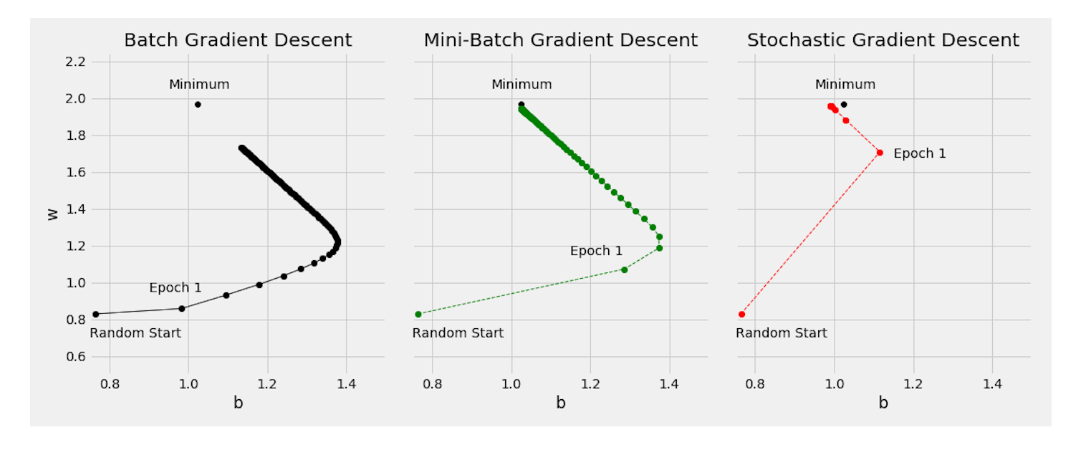

你可以看到，在第1个epoch结束时的结果参数彼此之间有很大的不同。这是根据批次大小，在一个epoch内发生的更新数量的直接后果。

在我们的例子中，对于100个epoch：
- 80个数据点（批次）。1个更新/历时，共100个更新。

- 16个数据点（小批量）。5次更新/历时，共500次更新。

- 1个数据点（随机的）。80个更新/历时，总共8000个更新。

所以对于中间和右边的图，随机开始和epoch 1之间的路径包含多个更新，这些更新没有在图中描绘出来。否则，它就会非常杂乱。这就是为什么连接两个epoch的线是虚线而不是实线。在现实中，每两个epoch之间会有 "之 "字形的连接线。

有两件事需要注意：

- 小批量梯度下降可以更接近最小点（使用相同数量的历时），这应该不奇怪，因为它比批量梯度下降受益于更多的更新。

- 随机梯度下降法的路径有些奇怪；它在第1个epoch结束时已经相当接近最小点，但随后似乎未能真正到达。但这是意料之中的，因为它每次更新都使用一个数据点，它永远不会稳定；永远在最小点的附近徘徊。

很明显，这里有一个权衡。要么我们有一个稳定而平滑的轨迹，要么我们更快地向最小点移动。

## 总结
这就结束了我们对梯度下降的内部工作的旅程。到目前为止，我们希望你能够对这个过程中涉及的许多不同方面形成更好的理解。

随着时间的推移和实践的进行，你会在自己的模型中观察到这里描述的行为。请确保尝试大量不同的组合：迷你批次大小、学习率等。这样一来，不仅你的模型会学习，你也会学习。

这是对我们在本章中所涉及的所有内容的（不那么）简短回顾：
- 定义一个简单的线性回归模型。
- 为其生成合成数据。
- 在我们的数据集上进行训练-验证分割。
- 随机地初始化我们模型的参数。
- 执行前向传递；也就是说，使用我们的模型进行预测。
- 计算与我们的预测相关的误差。
- 将误差汇总为损失（MSE）。
- 了解到用于计算损失的点的数量决定了我们所使用的梯度下降的种类：批量（所有）、小型批量或随机（1）。
- 可视化一个损失面的例子，并使用其横截面来获得个别参数的损失曲线。
- 学习梯度是一个偏导数，它代表了如果一个参数改变一点点，损失会有多大变化。
- 使用方程、代码和几何学计算我们模型参数的梯度。
- 学习更大的梯度对应更陡峭的损失曲线。
- 学习反向传播只不过是 "链式 "梯度下降。
- 使用梯度和学习率来更新参数。
- 比较使用小、大和非常大的学习率对损失的影响
- 学习所有参数的损失曲线在理想情况下应该是类似的陡峭。
- 可视化使用较大范围的特征的效果，使相应参数的损失曲线更加陡峭。
- 使用Scikit Learn的StandardScaler将一个特征带到一个合理的范围，从而使损失面更像碗状，其截面也同样陡峭。
- 学习像缩放这样的预处理步骤应该在训练-验证分割后应用，以防止泄漏。
- 计算出执行所有步骤（前向传递、损失、梯度和参数更新）需要一个 epoch。
- 观察梯度下降在许多历时中的路径，并意识到它在很大程度上取决于所使用的梯度下降类型：批处理、小批处理或随机的。
- 了解到批处理梯度下降的稳定和平滑路径与随机梯度下降的快速和有点混乱的路径之间有一个权衡，使得使用小批处理梯度下降成为其他两种梯度下降之间的一个很好的折中。

现在，你已经准备好把这一切放在一起，并使用PyTorch实际训练一个模型了!

In [3]:
import numpy as np
true_b = .5
true_w = -3
N = 100

# 数据生成
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# 使用前80个数据作为训练集
train_idx = idx[:int(N*.8)]
# 使用剩余20个数据作为验证集
val_idx = idx[int(N*.8):]

# 生成训练集和验证集
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
#随机初始化参数b和w
np.random.seed(42)#这里设置随机种子，保证每次运行结果一致
b = np.random.randn(1)
w = np.random.randn(1)

lr = 0.1

# 定义训练轮数
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1: 前向传播
    yhat = b + w * x_train
    
    # Step 2: 计算MSE损失
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    
    # Step 3: 计算梯度
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4: 参数更新
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)
print(loss)

[0.52354047] [-3.03103497]
0.008044657695524277
